## Matala 2

#### Present - Halel Shtern
#### ID - 212122147

In [173]:
import pandas as pd
import datetime
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [174]:
df = pd.read_csv("matala2_cosmetics_2019-Nov.csv")
df = df.iloc[0:1001,:]

c:\users\97250\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Q1

In [175]:
df['event_time']= df['event_time'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S UTC'))
df = df.sort_values(['user_session','event_time'])
#df.head()

In [176]:
df['next_time'] = df.groupby('user_session')['event_time'].shift(-1)  
df['duration_to_next_event'] = (df['next_time'] - df['event_time']).dt.total_seconds().fillna(0) 
df = df.drop('next_time', axis=1)
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
953,2019-11-01 01:03:35,view,5696324,1.487580e+18,NaN,estel,6.59,390049318,000a16cf-3a42-48f5-98e4-caf0bffbfab3,0.0
926,2019-11-01 01:00:57,view,5899436,1.487580e+18,NaN,NaN,7.11,511973458,017e38ca-43b3-479a-bb6a-745fe1729048,0.0
508,2019-11-01 00:38:39,view,5670001,1.495710e+18,NaN,konad,4.13,566276650,0226dd29-c6a4-4f3c-be5e-0222c3d9f5af,284.0
577,2019-11-01 00:43:23,view,5808567,1.495710e+18,NaN,irisk,2.38,566276650,0226dd29-c6a4-4f3c-be5e-0222c3d9f5af,0.0
702,2019-11-01 00:48:53,view,5677465,1.487580e+18,NaN,NaN,1.03,566286232,02729a78-7e1a-484e-8bcb-19cc06e25ed6,0.0


## Q2

In [177]:
df['event_time'] = pd.to_datetime(df['event_time'])
df.sort_values(['user_id','event_time'],inplace =True)
df['day_between'] = df.groupby('user_id')['event_time'].diff().dt.days

In [178]:
df['funnel_number'] = np.where(df['day_between'].fillna(0)> 5,1,0)
df.drop('day_between', axis =1,inplace =True)
df['funnel_number'] = df.groupby('user_id')['funnel_number'].cumsum()+1
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number
157,2019-11-01 00:13:10,remove_from_cart,5761411,1.487580e+18,NaN,ingarden,2.86,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,2.0,1
158,2019-11-01 00:13:12,remove_from_cart,5749154,1.487580e+18,NaN,NaN,0.22,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,2.0,1
159,2019-11-01 00:13:14,remove_from_cart,5749145,1.487580e+18,NaN,NaN,0.22,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,2.0,1
160,2019-11-01 00:13:16,remove_from_cart,5749153,1.487580e+18,NaN,NaN,0.22,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,0.0,1
161,2019-11-01 00:13:16,remove_from_cart,5749153,1.487580e+18,NaN,NaN,0.22,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,1.0,1


## Q3

In [179]:
df["index_in_funnel"] = df.groupby(["funnel_number", "user_session"]).cumcount() + 1
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
157,2019-11-01 00:13:10,remove_from_cart,5761411,1.487580e+18,NaN,ingarden,2.86,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,2.0,1,1
158,2019-11-01 00:13:12,remove_from_cart,5749154,1.487580e+18,NaN,NaN,0.22,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,2.0,1,2
159,2019-11-01 00:13:14,remove_from_cart,5749145,1.487580e+18,NaN,NaN,0.22,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,2.0,1,3
160,2019-11-01 00:13:16,remove_from_cart,5749153,1.487580e+18,NaN,NaN,0.22,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,0.0,1,4
161,2019-11-01 00:13:16,remove_from_cart,5749153,1.487580e+18,NaN,NaN,0.22,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,1.0,1,5


## Q4

In [180]:
df['price'] = df['price'].apply(lambda x: re.findall("[\d.]+",x))
df['price'] =df['price'].apply(lambda x: np.array(x)).astype(float)
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
157,2019-11-01 00:13:10,remove_from_cart,5761411,1.487580e+18,NaN,ingarden,2.86,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,2.0,1,1
158,2019-11-01 00:13:12,remove_from_cart,5749154,1.487580e+18,NaN,NaN,0.22,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,2.0,1,2
159,2019-11-01 00:13:14,remove_from_cart,5749145,1.487580e+18,NaN,NaN,0.22,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,2.0,1,3
160,2019-11-01 00:13:16,remove_from_cart,5749153,1.487580e+18,NaN,NaN,0.22,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,0.0,1,4
161,2019-11-01 00:13:16,remove_from_cart,5749153,1.487580e+18,NaN,NaN,0.22,202438687,8dc848f5-bac3-44d7-9414-75d4e599abaf,1.0,1,5


## Q5

In [181]:
event_types = df['event_type'].unique()
event_counts = df['event_type'].value_counts()

c:\users\97250\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

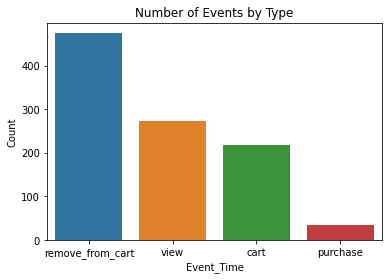

In [182]:
sns.barplot(event_types, event_counts, label = 'event_types')
plt.title('Number of Events by Type')
plt.xlabel('Event_Time')
plt.ylabel('Count')

## Q6